In [97]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

In [107]:
# create a dataframe with
# 1000 rows and 4 columns (named A, B, C, and D) of
# random numbers that range between 0 and 50
df = pd.DataFrame(np.random.randint(0,50,size=(1000, 4)), columns=list('ABCD'))

In [108]:
df.head()

,A,B,C,D
0,33,13,0,26
1,13,15,21,6
2,4,31,40,39
3,26,32,16,20
4,11,24,12,2


In [109]:
# add a column called 'category' and set it to
# a string that indicates the 'hundreds' of the index
df['category'] = df.apply(lambda x: str((x.name//100)*100)+'s', axis=1)

In [113]:
# df.hist('A', bins=10, figsize=(10,10))

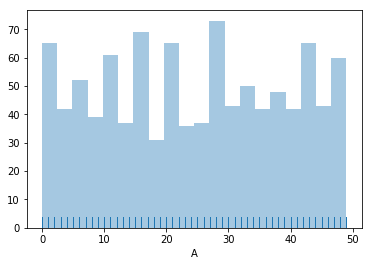

In [169]:
# use seaborn for the distplot
# return the 'patches' so you can find the height
p = sns.distplot(df['A'], bins=20, kde=False, rug=True).patches

In [170]:
# get the stats using the same bucketing parameters
bin_maxes, bin_edges, binnumber = stats.binned_statistic(df['A'], df['A'], statistic=max, bins=20)

In [171]:
# output some sanity checks
print("there are {} bins, and {} values.".format(len(bin_maxes), len(binnumber)))

there are 20 bins, and 1000 values.


In [172]:
# output some random value, again for sanity
pt_num = 766
print("data point {}({}) is in bin# {}".format(pt_num, df['A'][pt_num], binnumber[pt_num]))

data point 766(44) is in bin# 18


In [173]:
# here are the 'heights' of the buckets
heights = [item.get_height() for item in p]
# and here is the max of that list
print(max(heights))

73.0


In [174]:
# and here is the bucket index of the max of that list
most_populous_bucket = np.argmax(heights)
print(most_populous_bucket)

11


In [175]:
# and here is the max of the binned values from the bin with the most members
# remember, the 'statistic' called for was 'max' (not mean)
bin_maxes[most_populous_bucket]

29.0

In [168]:
# and here is the right bin-edge from that same bin
bin_edges[most_populous_bucket+1]

29.400000000000002